<div style="text-align:center; font-weight:bold; text-transform:uppercase; font-family:Verdana; font-size:45px; color:black; border-left: 2px solid red; border-right: 2px solid red; border-top: 5px solid red; padding: 0px;">Skin Caner Cell Classification</div>

<div style="border-right: 3px solid red; border-left: 3px solid red; padding: 15px; font-family: Verdana;">
  <h3 style="color: red; display: inline;">Source of Data:</h3><span style="font-weight: bold;"> Kaggle.com</span>
  <p><span style="font-weight: bold; color: black;">Redirect to data:</span> 
  <a href="https://www.kaggle.com/datasets/andrewmvd/isic-2019" style="background-color: #20BEFF; color: black; padding: 5px 10px; text-decoration: none; border-radius: 3px;">Kaggle Link</a></p>

  <div style="padding: 5px 10px; border: 1px solid red; border-radius: 5px;">
    <h3 style="color: red;">Description:</h3>
    <p>This dataset contains the training data for the ISIC 2019 challenge, note that it already includes data from previous years (2018 and 2017).</p>
    <p>The dataset for ISIC 2019 contains 25,331 images available for the classification of dermoscopic images among nine different diagnostic categories:</p>
    <ol>
      <li>Melanoma</li>
      <li>Melanocytic nevus</li>
      <li>Basal cell carcinoma</li>
      <li>Actinic keratosis</li>
      <li>Benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis)</li>
      <li>Dermatofibroma</li>
      <li>Vascular lesion</li>
      <li>Squamous cell carcinoma</li>
      <li>None of the above</li>
    </ol>
  </div>

  <h3 style="color: red;">Platform:</h3>
  <p>GADI, National Computational Infrastructure</p>
  <h3 style="color: red;">Project Code:</h3>
  <p>xw97</p>

  <h3 style="color: red;">Analyst Details:</h3>
  <ul>
    <li><strong>ID:</strong> jj7317</li>
    <li><strong>Name:</strong> Jatin Jassi</li>
  </ul>

  <h3 style="color: red;">Notebook Author:</h3>
  <p>Jatin Jassi</p>
</div>


<h2 style="text-align: center; color: red; font-size: 34px; margin-bottom: 20px;">Notebook Index</h2>
<table style="width: 100%; border-collapse: collapse; font-size: 1.2em; border: 2px solid red; border-bottom: 5px solid red; margin: 0px;">
  <thead>
    <tr style="background-color: red; color: white; line-height: 1.5;">
      <th style="padding: 10px 20px;">Title</th>
      <th style="padding: 10px 20px;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 10px 20px;"><a href="#setup" style="text-decoration: none; color: red;"><strong>SETUP</strong></a></td>
      <td style="padding: 10px 20px;">Loading required packages & local machine (GADI) setup.</td>
    </tr>
    <tr>
      <td style="padding: 10px 20px;"><a href="#initiating-image-loading" style="text-decoration: none; color: red;"><strong>INITIATING IMAGE LOADING</strong></a></td>
      <td style="padding: 10px 20px;">Loading images & conducting required pre-processing.</td>
    </tr>
    <tr>
      <td style="padding: 10px 20px;"><a href="#visualizing" style="text-decoration: none; color: red;"><strong>VISUALIZING</strong></a></td>
      <td style="padding: 10px 20px;">Ensuring proper image pre-processing.</td>
    </tr>
    <tr>
      <td style="padding: 10px 20px;"><a href="#model-selection-and-setup" style="text-decoration: none; color: red;"><strong>MODEL SELECTION AND SETUP</strong></a></td>
      <td style="padding: 10px 20px;">Selecting, Creating, Configuring, Executing (Training) & Explaining.</td>
    </tr>
    <tr>
      <td style="padding: 10px 20px;"><a href="#model-evaluation-and-performance-analysis" style="text-decoration: none; color: red;"><strong>MODEL EVALUATION AND PERFORMANCE ANALYSIS</strong></a></td>
      <td style="padding: 10px 20px;">Analyzing & interpreting model performance via performance metrics.</td>
   </tr>
  </tbody>
</table>


<h1 id="setup" align="center" style="color:#FF0000; background-color:#333333; padding:10px; border-bottom: 3px solid #FF0000;">SETUP</h1>


In [1]:
pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
import os
import shutil
import itertools
import pathlib
from PIL import Image

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torchvision.io import read_image
import torch.optim as optim

from tqdm import tqdm  # Import tqdm for progress bar

import warnings
warnings.filterwarnings('ignore')
print('Using PyTorch version', torch.__version__)
# Setup device-agnostic code

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

Using PyTorch version 2.3.0


device(type='cuda')

<span style="color:#5C5B5B; font-size:1.17em; font-style:italic; border-top:1px solid #5C5B5B; display:block; padding: 0px 5px;">Explanation:</span>

- **Importing Libraries:**
  - `import os, shutil, pathlib`: Standard libraries for file and path operations.
  - `from PIL import Image`: For image manipulation.
  - `import cv2`: OpenCV for image processing.
  - `import matplotlib.pyplot as plt, numpy as np, pandas as pd, seaborn as sns, plotly.express as px`: Visualization and data manipulation libraries.
  - `from sklearn.preprocessing import LabelEncoder, MinMaxScaler`: Data preprocessing.
  - `from sklearn.model_selection import train_test_split`: Splitting dataset.
  - `from sklearn.metrics import confusion_matrix, classification_report`: Model evaluation metrics.
  - `import torch, torchvision, torch.nn as nn, torch.nn.functional as F`: PyTorch libraries for deep learning.
  - `from torch.utils.data import Dataset, DataLoader`: Data handling for PyTorch.
  - `from torchvision import datasets, transforms, make_grid`: Data transformations and utilities for visualization.
  - `from tqdm import tqdm`: For progress bars in loops.
  - `import warnings`: To control warning messages.
  - `warnings.filterwarnings('ignore')`: Ignore warnings.
  - `print('Using PyTorch version', torch.__version__)`: Display the PyTorch version.
- **Device Setup:**
  - `device = torch.device("cuda" if torch.cuda.is_available() else "cpu")`: Set device to GPU if available, otherwise CPU.
  - `print(device)`: Display the device being used.

In [3]:
import torch

print(torch.cuda.is_available())

True


<span style="color:#5C5B5B; font-size:1.17em; font-style:italic; border-top:1px solid #5C5B5B; display:block; padding: 0px 5px;">Explanation:</span>




**Check GPU Availability:**
  - `import torch`: Import PyTorch library.
  - `print(torch.cuda.is_available())`: Print whether CUDA is available (GPU usage).

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


<span style="color:#5C5B5B; font-size:1.17em; font-style:italic; border-top:1px solid #5C5B5B; display:block; padding: 0px 5px;">Explanation:</span>

**Device Configuration:**
- `device = torch.device("cuda" if torch.cuda.is_available() else "cpu")`: Configure PyTorch to use CUDA if available.
- `print("Using device:", device)`: Print the device configuration.

In [5]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /home/576/jj7317


<span style="color:#5C5B5B; font-size:1.17em; font-style:italic; border-top:1px solid #5C5B5B; display:block; padding: 0px 5px;">Explanation:</span>

**Working Directory Information:**
  - `import os`: Import OS library for operating system operations.
  - `print("Current Working Directory:", os.getcwd())`: Print the current working directory.

<h1 id="initiating-image-loading" align="center" style="color:#FF0000; background-color:#333333; padding:10px; border-bottom: 3px solid #FF0000;">INITIATING IMAGE LOADING</h1>

### **Step 1:** Define Image Transformations

In [20]:
from torchvision import transforms
# Image transformations
transformations = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

<span style="color:#5C5B5B; font-size:1.17em; font-style:italic; border-top:1px solid #5C5B5B; display:block; padding: 0px 5px;">Explanation:</span>

**Image transformation pipeline:** 3 transformations applied:
1. `Rezise`: From 512 x 512 to **256 x 256**. 
2. `ToTensor`: Conversion to **tensor format**. 
3. `Normalize`: To **reduce** the image **variance**.

<div style="border:2px solid green; color:green; padding:10px;">
    4. <code>RandomHorizontalFlip</code>: A random <strong>horizontal rotation/flip</strong> to increase variability among the image, leading to further <strong>generalization</strong>.<br>
    5. <code>RandomRotation</code>: A random <strong>vertical rotation/flip</strong> to increase variability among the image, leading to further <strong>generalization</strong>. 
</d
v>*. 

### **Step 2:** DataLoader

In [7]:
import os

path = '/scratch/xw97/jj7317/1-Skin-L-cell-classification/ext-data/ISIC_2019_Training_Input/ISIC_2019_Training_Input'
print(os.listdir(path))

['ISIC_0070677.jpg', 'ISIC_0031352.jpg', 'ISIC_0031812.jpg', 'ISIC_0031377.jpg', 'ISIC_0026975.jpg', 'ISIC_0008998_downsampled.jpg', 'ISIC_0000102_downsampled.jpg', 'ISIC_0033677.jpg', 'ISIC_0069622.jpg', 'ISIC_0054421.jpg', 'ISIC_0030067.jpg', 'ISIC_0030514.jpg', 'ISIC_0058746.jpg', 'ISIC_0054796.jpg', 'ISIC_0064467.jpg', 'ISIC_0033147.jpg', 'ISIC_0061824.jpg', 'ISIC_0062424.jpg', 'ISIC_0068979.jpg', 'ISIC_0028753.jpg', 'ISIC_0026483.jpg', 'ISIC_0029231.jpg', 'ISIC_0059609.jpg', 'ISIC_0000242.jpg', 'ISIC_0072626.jpg', 'ISIC_0058833.jpg', 'ISIC_0073008.jpg', 'ISIC_0054257.jpg', 'ISIC_0032907.jpg', 'ISIC_0010456.jpg', 'ISIC_0026801.jpg', 'ISIC_0032342.jpg', 'ISIC_0025993.jpg', 'ISIC_0029346.jpg', 'ISIC_0058636.jpg', 'ISIC_0016031_downsampled.jpg', 'ISIC_0064553.jpg', 'ISIC_0026539.jpg', 'ISIC_0013712_downsampled.jpg', 'ISIC_0024800.jpg', 'ISIC_0032685.jpg', 'ISIC_0031947.jpg', 'ISIC_0033639.jpg', 'ISIC_0060773.jpg', 'ISIC_0056291.jpg', 'ISIC_0031148.jpg', 'ISIC_0024884.jpg', 'ISIC_00150

**Path specified** to local machine. 

In [8]:
from PIL import Image
from torch.utils.data import random_split

class CustomSkinDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.img_labels = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_filename = self.img_labels.iloc[idx, 0] + '.jpg'
        #img_path = os.path.join(self.img_dir, img_filename)
        img_path = self.img_dir + '/' + self.img_labels.iloc[idx, 0] + '.jpg'
        image = Image.open(img_path).convert('RGB')

        labels = self.img_labels.iloc[idx, 1:].values
        # Convert to numeric and handle non-numeric data
        labels = pd.to_numeric(labels, errors='coerce').astype(float)
        label = torch.argmax(torch.tensor(labels, dtype=torch.float32))  # Convert labels to index

        if self.transform:
            image = self.transform(image)

        return image, label

<span style="color:#5C5B5B; font-size:1.17em; font-style:italic; border-top:1px solid #5C5B5B; display:block; padding: 0px 5px;">Explanation:</span>

- **Importing Libraries:** Required libraries/packages like `Image` & `random_split`, for creating labelling class are imported & loaded. 

- **Creating image labelling class:** For `ISIC_2019_Training_GroundTruth.csv` file. 
1. The `__init__` function is a constructor function initializing the class attributes. 
2. The `__len__` function returns the length of the labeled images.
3. The `__getitem__` function reads the labels, transforms it to tensor & maps it to the images label file (`ISIC_2019_Training_GroundTruth.csv`).

In [9]:
# Load dataset
img_dir = '/scratch/xw97/jj7317/1-Skin-L-cell-classification/ext-data/ISIC_2019_Training_Input/ISIC_2019_Training_Input'  
csv_file = '/scratch/xw97/jj7317/1-Skin-L-cell-classification/ext-data/ISIC_2019_Training_GroundTruth.csv'
dataset = CustomSkinDataset(csv_file=csv_file, img_dir=img_dir, transform=transformations)

# Split dataset#
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

<span style="color:#5C5B5B; font-size:1.17em; font-style:italic; border-top:1px solid #5C5B5B; display:block; padding: 0px 5px;">Explanation:</span>

- **Loading the dataset:** Uploading the dataset & passing through the `CustomSkinDataset` class. 
- **Splitting the data:** With train size 80%.

In [10]:
# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("Dataset and DataLoaders are set up and ready!")
img = '/scratch/xw97/jj7317/1-Skin-L-cell-classification/ext-data/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0000000.jpg'

Dataset and DataLoaders are set up and ready!


<span style="color:#5C5B5B; font-size:1.17em; font-style:italic; border-top:1px solid #5C5B5B; display:block; padding: 0px 5px;">Explanation:</span>

**Data Loader:** Loading Training & Validation datasets (defined earlier) using `DataLoader` With:
- `train_dataset` having batch size of `32`with `shuffle=True`, the image ordering does not affect training. 
- `val_dataset` having batch size of `32`. 

<h1 id="visualizing" align="center" style="color:#FF0000; background-color:#333333; padding:10px; border-bottom: 3px solid #FF0000;">VISUALIZING</h1>

In [11]:
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))  # convert from Tensor image
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean  # unnormalize
    img = np.clip(img, 0, 1)  # clip any values falling outside this range
    plt.imshow(img)
    plt.axis('off')  # hide the axes
    plt.show()

**Converting Tensor** back to a normalized **NumPy array** to visualise. 

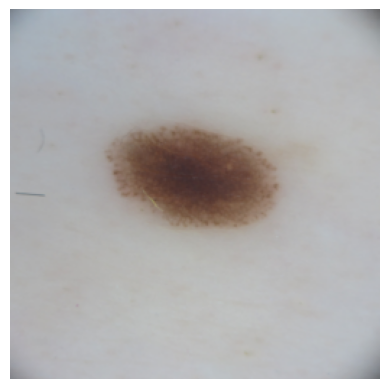

In [12]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(images[0])  # Display the first image from the batch

Using `dataiter` defined by `iter` to randomise image print (for `train_loader`) after every execution. 

<h1 id="model-selection-and-setup" align="center" style="color:#FF0000; background-color:#333333; padding:10px; border-bottom: 3px solid #FF0000;">MODEL SELECTION AND SETUP</h1>

### **Step 1:** Custom Model selection - RESNET50

In [13]:
import torch.nn as nn
import torchvision.models as models
from torchvision.models import resnet50, ResNet50_Weights

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load a pretrained ResNet50 model with the updated method
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

# Freeze all layers in the model
for param in model.parameters():
    param.requires_grad = False

# Replace the final layer of the model to match the number of classes (9 in this case)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 9)  # 9 classes for our classification

# Move the model to the right device
model = model.to(device)

print("Model has been customized and moved to the device:", device)

Model has been customized and moved to the device: cuda


<span style="color:#5C5B5B; font-size:1.17em; font-style:italic; border-top:1px solid #5C5B5B; display:block; padding: 0px 5px;">Explanation:</span>

- **`resnet50`:** For being well known for image classification & image feature extraction, We are using a predefined `resnet50` model.
- **`IMAGENET1K_V1`:** We use a specifc version of ImageNet - `IMAGENET1K_V1`.

#### <u>*Why `resnet50`? Why pre-defined model?*</u>:
1. With about **50 layers** (***convolutional layers***, ***activation functions***, & ***residual blocks***), starting with `resnet50` architecture, rather than a new & weak one, can be more optimising for overall classification problem.
2. With `resnet50` being trained on `ImageNet-1K`, the step of **regularisation can be skipped** as it has been trained on approximately ***1.2m images*** (*1,000 classes*).
3. With proven performance & better chances of better accuracy, using a `resnet50` could be significantly **cost effective** in terms of computing power in GADI, NCI.

#### <u>*Why `IMAGENET1K_V1`*</u>:
1. With very **generalised** & extensive training in images (covering **1,000** distinct), `IMAGENET1K_V1` easily shifts & focuses on dermoscopic images & its classification. 
2. Out 2 classic accuracy related problem in an ML case study, the problem of **underfitting is avoided** by starting with `IMAGENET1K_V1`. 
3. Furthermore, starting with `resnet50` architechture & `IMAGENET1K_V1`, we get more scope of tuning & adjusting final layer. 

### **Step 2:** Configure Training Parameters

In [22]:
import torch.optim as optim 

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr = 0.001)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

print("Config successfull")

Config successfull


<span style="color:#5C5B5B; font-size:1.17em; font-style:italic; border-top:1px solid #5C5B5B; display:block; padding: 0px 5px;">Explanation:</span>

1. **Loss Function Initialization:** We execute `nn.CrossEntropyLoss()` to initializes the **cross-entropy loss function**, typically used for classification tasks.
This loss combines `nn.LogSoftmax()` and `nn.NLLLoss()` in one single class.
2. **Optimizer Initialization:** The `optim.Adam` initializes the **Adam optimizer**, an adaptive learning rate optimization algorithm. Parameters specified:
    - `model.fc.parameters()`: Specifies the parameters of the **fully connected layer** of the model **to be optimized**.
    - `lr=0.001`: Sets the learning rate to **0.001**.
3. **Learning Rate Scheduler Initialization:** We specify `optim.lr_scheduler.StepLR` that initializes a learning rate scheduler that decays the learning rate **by a factor of gamma** every `step_size` epochs. Parameters specified:
    - `optimizer`: The **optimizer** whose learning rate will be scheduled.
    - `step_size=7`: **7 epochs** between each learning rate decay.
    - `gamma=0.1`: Multiplicative factor of **0.1** for learning rate decay.

#### <u>*Why `CrossEntropyLoss`?*</u>We use the `CrossEntropyLoss` as our loss function as it is known for **multi-class classification** as unlike other loss functions where misclassification is penalised equally, it penalises the misclassification propotionatly, based on error.

*Gradient Optimization: It provides robust gradient signals. It avoids the vanishing gradient problem typically seen with sigmoid in the case of binary classifications extended to multi-class tasks, making the learning process faster and more reliable.*`.

### **Step 3:** Creating training Loop

In [15]:
dataset = CustomSkinDataset(csv_file=csv_file, img_dir=img_dir, transform=transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
]))

# Define your train, validation, and test split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Compute lengths for each subset
train_len = int(len(dataset) * train_ratio)
val_len = int(len(dataset) * val_ratio)
test_len = len(dataset) - train_len - val_len

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_len, val_len, test_len])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

<span style="color:#5C5B5B; font-size:1.17em; font-style:italic; border-top:1px solid #5C5B5B; display:block; padding: 0px 5px;">Explanation:</span>

1. **Initializing custom dataset:**
    - `CustomSkinDataset`: Custom dataset class for skin images, initialized with a CSV file and image directory.
    - transform: Data transformation pipeline applied to each image.
        - transforms.Resize((224, 224)): Resizes images to 224x224 pixels.
        - transforms.ToTensor(): Converts images to PyTorch tensors.

2. **Define Split Ratios:**
    - `train_ratio = 0.7`: **70%** of the dataset will be used for **training**.
    - `val_ratio = 0.15`: **15%** of the dataset will be used for **validation**.
    - `test_ratio = 0.15`: **15%** of the dataset will be used for **testing**.
  
3. Calculate **Subset Lengths:**
- `train_len = int(len(dataset) * train_ratio)`: **Number of samples** for the **training set**. Multiplies the dataset length by the training ratio and converts to an integer.
- `val_len = int(len(dataset) * val_ratio)`: **Number of samples** for the **validation set**. Multiplies the dataset length by the validation ratio and converts to an integer.
- `test_len = len(dataset) - train_len - val_len`: **Number of samples** for the **test set**. Ensures the remaining samples are allocated to the test set to avoid rounding issues.

4. **Split the Dataset:** Using `random_split(dataset, [train_len, val_len, test_len])`, we randomly splits the dataset into training, validation, and test subsets with specified lengths.
5. **Creating Data Loaders:** We use the utility `DataLoader` to load data in batches for training and evaluation. Parameters specified:
    - `train_loader`:
        - `train_dataset`: **Dataset** for training.
        - `batch_size=32`: **32 samples** per batch.
        - `shuffle=True`: **Shuffles** the data at every epoch.
        - `num_workers=4`: **4 subprocesses** to use for data loading.
    - `val_loader` and `test_loader`: Similar to `train_loader`, but with `shuffle=False` to **maintain order** during evaluation.

### **Step 4:** Training model

In [25]:
def train_mod(model, train_loader, val_loader, test_loader, criterion, optimizer, scheduler, num_epochs=20, patience=5):
    best_val_accuracy = 0.0
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_accuracy = 100 * correct / total
        print(f'Epoch number: {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_accuracy:.2f}%')

        ## VALIDATION ##
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

            val_epoch_loss = val_running_loss / len(val_loader.dataset)
            val_epoch_accuracy = 100 * val_correct / val_total
            print(f'Validation loss: {val_epoch_loss:.4f} - Validation accuracy: {val_epoch_accuracy:.2f}%')

        if val_epoch_accuracy > best_val_accuracy:
            best_val_accuracy = val_epoch_accuracy
            epochs_no_improve = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            epochs_no_improve += 1

        # Early stopping
        if epochs_no_improve >= patience:
            print('Early stopping triggered')
            break

        # Step the scheduler
        scheduler.step()

    ## TEST ##
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    test_running_loss = 0.0
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

        test_loss = test_running_loss / len(test_loader.dataset)
        test_accuracy = 100 * test_correct / test_total
        print(f'Test loss: {test_loss:.4f} - Test accuracy: {test_accuracy:.2f}%')

    return model

trained_model = train_mod(model, train_loader, val_loader, test_loader, criterion, optimizer, scheduler, num_epochs=20)

Epoch number: 1/20 - Loss: 0.7581 - Accuracy: 71.98%
Validation loss: 0.8985 - Validation accuracy: 68.36%
Epoch number: 2/20 - Loss: 0.7410 - Accuracy: 72.31%
Validation loss: 0.8607 - Validation accuracy: 70.36%
Epoch number: 3/20 - Loss: 0.7496 - Accuracy: 72.22%
Validation loss: 0.8510 - Validation accuracy: 69.89%
Epoch number: 4/20 - Loss: 0.7441 - Accuracy: 72.44%
Validation loss: 0.8688 - Validation accuracy: 69.62%
Epoch number: 5/20 - Loss: 0.7512 - Accuracy: 71.90%
Validation loss: 0.9348 - Validation accuracy: 67.47%
Epoch number: 6/20 - Loss: 0.7362 - Accuracy: 72.74%
Validation loss: 0.8555 - Validation accuracy: 69.97%
Epoch number: 7/20 - Loss: 0.7297 - Accuracy: 72.79%
Validation loss: 0.8604 - Validation accuracy: 68.73%
Early stopping triggered
Test loss: 0.8805 - Test accuracy: 69.51%


<span style="color:#5C5B5B; font-size:1.17em; font-style:italic; border-top:1px solid #5C5B5B; display:block; padding: 0px 5px;">Explanation:</span>

<div style="color:##5C5B5B; border-right: 3px solid #5C5B5B; text-align: right; padding: 0px 7px;">Overall model architect</div>


1. We define a function **`train_mod`** with parameters:
    - `model`: The NN model to be trained.
    - `train_loader`, `val_loader`, `test_loader`: Data loaders for training, validation and testing datasets, respectively.
    - `criterion`: Loss function *(earlier specfied as `nn.CrossEntropyLoss()`)*.
    - `optimizer`: Optimization algorithm *(earlier specfied as `nn.CrossEntropyLoss()`)*.
    - `num_epochs`: Number of training epochs (default is 20).>
.



<div style="border:2px solid green; color:green; padding:10px;">
    <ul style="list-style-type: disc; margin: 0; padding-left: 20px;">
        <li><code>scheduler</code>: Learning rate scheduler <em>(earlier specified as <code>StepLR</code>)</em>.</li>
        <li><code>patience</code>: Number of epochs to wait for improvement before stopping (default is 5).</li>
    </ul>
<div>

2. We store the **highest validation accuracy** by defining an object **`best_val_accuracy`** & using `epochs_no_improve` later on.

3. Creating **Epoch loop**:
    - Loops through each epoch from 0 to `num_epochs - 1`.
    - Sets the model to training mode with `model.train()`.
    - Initializes `running_loss`, `correct`, and `total` to track metrics within the epoch.

4. Creating **Batch processing loop**:
    - **Iterates** through batches of data in `train_loader`.
    - **Transfers** `inputs` and `labels` to the *GADI* directory.
    - **Resets** the gradients using `optimizer.zero_grad()`.
    - **Computes** `model` outputs.
    - **Calculates loss** using the `criterion`.
    - Performs **backpropagation** with `loss.backward()`.
    - **Updates model parameters** with `optimizer.step()`.
    - **Accumulates `running_loss`** for the epoch by multiplying the batch loss by the number of samples in the batch `(loss.item() * inputs.size(0))`.
    - Determines the **predicted class for each sample** in the batch using `torch.max(outputs.data, 1)`.
    - **Increases the total number of samples** processed in the epoch with `total += labels.size(0)`.
    - **Counts the number of correct predictions** in the batch and adds to the correct count for the epoch with `(predicted == labels).sum().item()`.
    - **Calculates the average loss per sample** for the epoch with `epoch_loss = running_loss / len(train_loader.dataset)`.
    - **Calculates the accuracy percentage** for the epoch with `epoch_accuracy = 100 * correct / total`.
    - **Prints** the **current epoch's number**, **loss** and **accuracy** to the console.

<div style="color:##5C5B5B; border-right: 3px solid #5C5B5B; text-align: right; padding: 0px 7px;">Model validation</div>

5. Model **validation**: We set the model in validation mode using `eval()`. 
6. Initializing **validation metrics**:
    - `val_running_loss`: Accumulates the **total validation loss**.
    - `val_correct`: Counts the **number of correct predictions** in the validation set.
    - `val_total`: Counts the **total number of samples** in the validation set.
7. Validation **Batch processing loop**:
    - **with `torch.no_grad()`:** Disables gradient calculation for memory efficiency and speed during validation.
    - **Transfers** `inputs` and `labels` to the *GADI* directory.
    - **Model Inference:** Generates predictions with `outputs = model(inputs)`.
    - **Calculate Loss:** Computes the loss for the batch with `loss = criterion(outputs, labels)`.
    - **Accumulate Validation Loss:** Adds the batch loss to the running total, scaled by batch size.
    - **Predict Classes:** Determines the predicted classes for the batch.
    - **Update Totals:** Increments `val_total` by the number of samples in the batch and `val_correct` by the number of correct predictions.
8. Validation **metric calculation**:
    - **Calculate Average Loss:** `val_epoch_loss = val_running_loss / len(val_loader.dataset)` Computes the average loss per sample for the validation set.
    - **Calculate Accuracy:** val_epoch_accuracy = `100 * val_correct / val_total` Computes the accuracy percentage for the validation set.>
    </ul>
</div>
>
    </ul>
</div>
   </ul>
</div>
ul>
</div>
>
</div>
/ul>
</div>
div>
ul>
</div>


<div style="border:2px solid green; color:green; padding:10px;">
    <strong>9. Saving best Model:</strong>
    <ul style="list-style-type: disc; margin: 0; padding-left: 40px;"> <!-- Increased padding for all sub points -->
        <li>If the current validation accuracy is greater than <code>best_val_accuracy</code>:
            <ul style="list-style-type: circle; margin: 0; padding-left: 40px;"> <!-- Further indent sub-sub points -->
                <li>update <code>best_val_accuracy</code></li>
                <li>reset <code>epochs_no_improve</code></li>
                <li>save the model state.</li>
            </ul>
        </li>
        <li>If not, increment <code>epochs_no_improve</code>.</li>
    </ul>
    <strong>10. Early Stopping and Scheduler Step:</strong>
    <ul style="list-style-type: disc; margin: 0; padding-left: 40px;"> <!-- Consistent padding for these sub points too -->
        <li>If <code>epochs_no_improve</code> reaches the <code>patience</code> threshold:
            <ul style="list-style-type: circle; margin: 0; padding-left: 40px;"> <!-- Maintain indent for clarity -->
                <li>print a message and break the training loop, stopping training early.</li>
            </ul>
        </li>
        <li>We call the <code>scheduler.step()</code> to update the learning rate based on <code>val_epoch_accuracy</code>.</li>
    </ul>
</div>

<div style="color:##5C5B5B; border-right: 3px solid #5C5B5B; text-align: right; padding: 0px 7px;">Model Testing</div>

11. **Initiating Testing phase**:
    - **Loads the best model's state** saved during validation with `model.load_state_dict(torch.load('best_model.pth'))`.
    - Sets the model to **evaluation mode** with `model.eval()`.
    - `test_running_loss`: Accumulates the **total test loss**
    - `test_correc`t: Counts the **number of correct predictions** in the test set.
    - `test_total`: Counts the **total number of samples** in the test set.
   
12. Test **Batch processing loop**: We start our testing loop **`with torch.no_grad()`** that disables gradient calculation for memory efficiency and speed during testing.
    - **Transfer to Device:** Moves `inputs` and `labels` to the specified device.
    - **Model Inference:** Generates predictions with `outputs = model(inputs)`.
    - **Calculate Loss:** Computes the loss for the batch with `loss = criterion(outputs, labels)`.
    - **Accumulate Test Loss:** Adds the batch loss to the `test_running_loss`, scaled by batch size.
    - **Predict Classes:** Determines the predicted classes for the batch.
    - **Update Totals:** Increments `test_total` by the number of samples in the batch and `test_correct` by the number of correct predictions.
   
13. Test **metric calculation**:
    - `test_loss = test_running_loss / len(test_loader.dataset)`: Computes the **average loss** per sample for the **test set**.
    - `test_accuracy = 100 * test_correct / test_total`: Computes the **accuracy percentage** for the **test set**.
    - Prints the test loss and accuracy *(```print(f'Test loss: {test_loss:.4f} - Test accuracy: {test_accuracy:.2f}%')```)*.

<div style="color:##5C5B5B; border-right: 3px solid #5C5B5B; text-align: right; padding: 0px 7px;">Calling</div>

14. We now calls the **`train_mod`** function with the specified parameters to **train** the model and **stores** the trained model in **`trained_model`**.

<h1 id="model-evaluation-and-performance-analysis" align="center" style="color:#FF0000; background-color:#333333; padding:10px; border-bottom: 3px solid #FF0000;">MODEL EVALUATION AND PERFORMANCE ANALYSIS</h1>

The training process ran for **7 epochs** out of the planned 20, with early stopping triggered due to a lack of improvement in validation accuracy. The final test performance was evaluated after stopping the training. Below is a detailed interpretation of the training, validation, and test metrics.stopping mechanism worked effectively.

<table>
  <thead>
    <tr style="background-color: green; color: white;">
      <th><strong>Training Loss</strong></th>
      <th><strong>Training Accuracy</strong></th>
      <th><strong>Validation Loss</strong></th>
      <th><strong>Validation Accuracy</strong></th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: white; color: black;">
      <td><strong>0.7297</strong></td>
      <td><strong>72.79%</strong></td>
      <td><strong>0.8604</strong></td>
      <td><strong>68.73%</strong></td>
    </tr>
  </tbody>
</table>

<u>Early Stopping</u>
- **Trigger:** Early stopping was triggered after the 7th epoch because there was no significant improvement in validation accuracy over the previous epochs.
- **Effect:** This prevents overfitting, ensuring the model doesn't continue to train on patterns specific to the training data that don’t generalize well to new data.

<u>Test Performance</u>
- **Test Loss:** 0.8805
- **Test Accuracy:** 69.51%
- **Interpretation:** The test accuracy is close to the validation accuracy, indicating that the model generalizes reasonably well to unseen data. This is a positive outcome, suggesting that the early stopping mechanism worked effectively.

<div style="color:#5C5B5B; border-right: 3px solid #5C5B5B; text-align: right; padding: 0px 7px; font-size: 1.17em; font-weight: bold;">Comprehensive Interpretation</div>


<table>
  <thead>
    <tr style="background-color: green; color: white;">
      <th><strong>Epoch</strong></th>
      <th><strong>Training Loss</strong></th>
      <th><strong>Training Accuracy</strong></th>
      <th><strong>Validation Loss</strong></th>
      <th><strong>Validation Accuracy</strong></th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: white; color: black;">
      <td><strong>1</strong></td>
      <td><strong>0.7581</strong></td>
      <td><strong>71.98%</strong></td>
      <td><strong>0.8985</strong></td>
      <td><strong>68.36%</strong></td>
    </tr>
    <tr style="background-color: white; color: black;">
      <td><strong>2</strong></td>
      <td><strong>0.7410</strong></td>
      <td><strong>72.31%</strong></td>
      <td><strong>0.8607</strong></td>
      <td><strong>70.36%</strong></td>
    </tr>
    <tr style="background-color: white; color: black;">
      <td><strong>3</strong></td>
      <td><strong>0.7496</strong></td>
      <td><strong>72.22%</strong></td>
      <td><strong>0.8510</strong></td>
      <td><strong>69.89%</strong></td>
    </tr>
    <tr style="background-color: white; color: black;">
      <td><strong>4</strong></td>
      <td><strong>0.7441</strong></td>
      <td><strong>72.44%</strong></td>
      <td><strong>0.8688</strong></td>
      <td><strong>69.62%</strong></td>
    </tr>
    <tr style="background-color: white; color: black;">
      <td><strong>5</strong></td>
      <td><strong>0.7512</strong></td>
      <td><strong>71.90%</strong></td>
      <td><strong>0.9348</strong></td>
      <td><strong>67.47%</strong></td>
    </tr>
    <tr style="background-color: white; color: black;">
      <td><strong>6</strong></td>
      <td><strong>0.7362</strong></td>
      <td><strong>72.74%</strong></td>
      <td><strong>0.8555</strong></td>
      <td><strong>69.97%</strong></td>
    </tr>
    <tr style="background-color: white; color: black;">
      <td><strong>7</strong></td>
      <td><strong>0.7297</strong></td>
      <td><strong>72.79%</strong></td>
      <td><strong>0.8604</strong></td>
      <td><strong>68.73%</strong></td>
    </tr>
    <tr style="background-color: white; color: black;">
      <td><strong>Test</strong></td>
      <td><strong>0.8805</strong></td>
      <td><strong>69.51%</strong></td>
      <td></td>
      <td></td>
    </tr>
  </tbody>
</table>

**Model Learning Dynamics:**
- The model **<strong style="color:darkgreen;">starts strong with good initial accuracy of 71.98%</strong>** and gradually improves its understanding of the training data.
- The fluctuations in validation accuracy and loss indicate a balance between learning and overfitting, which is **<strong style="color:darkgreen;">well-managed by the learning rate scheduler</strong>** and **<strong style="color:darkgreen;">early stopping</strong>**.

**Early Stopping Effectiveness:**
- **<strong style="color:darkgreen;">Ensures that the model does not overfit</strong>** at the **7th epoch**, saving computational resources and avoiding unnecessary training.
- The patience parameter effectively **<strong style="color:darkgreen;">monitored the model’s performance</strong>** and **<strong style="color:darkgreen;">decided on the optimal point to halt training</strong>**.

**Learning Rate Scheduler Impact:**
- The learning rate scheduler helped **<strong style="color:darkgreen;">adjust the learning pace</strong>**, preventing the model from making large updates that could lead to instability.

<div style="color:#5C5B5B; border-right: 3px solid #5C5B5B; text-align: right; padding: 0px 7px; font-size: 1.17em; font-weight: bold;">Validation vs Tesing</div>

<table>
  <thead>
    <tr style="background-color: green; color: white;">
      <th><strong>Metric</strong></th>
      <th><strong>Best Validation</strong></th>
      <th><strong>Final Test</strong></th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: white; color: black;">
      <td><strong>Loss</strong></td>
      <td><strong>0.8510 (Epoch 3)</strong></td>
      <td><strong>0.8805</strong></td>
    </tr>
    <tr style="background-color: white; color: black;">
      <td><strong>Accuracy</strong></td>
      <td><strong>70.36% (Epoch 2)</strong></td>
      <td><strong>69.51%</strong></td>
    </tr>
 </tbody>
</table>


- **Consistency in Accuracy:** The validation accuracy (**<strong style="color:darkgreen;">best: 70.36%</strong>**, **<strong style="color:darkgreen;">final: 68.73%</strong>**) is consistent with the test accuracy (**<strong style="color:darkgreen;">69.51%</strong>**), suggesting that the model **<strong style="color:darkgreen;">generalizes well to unseen data</strong>**.
- **Loss Comparison:** Validation loss (**<strong style="color:darkgreen;">best: 0.8510</strong>**) is close to the test loss (**<strong style="color:darkgreen;">0.8805</strong>**), indicating that the **<strong style="color:darkgreen;">validation metrics were reliable indicators of the model’s final performance</strong>**.
- **Early Stopping Effectiveness:** Early stopping based on **<strong style="color:darkgreen;">validation performance prevented overfitting</strong>**, as evidenced by the close match between validation and test accuracies.
- **Generalization Capability:** The model’s performance on the test set, which was not seen during training or validation, confirms that it **<strong style="color:darkgreen;">generalizes well</strong>**, **<strong style="color:darkgreen;">maintaining a high accuracy</strong>ity.


<div style="color:#5C5B5B; border-right: 3px solid #5C5B5B; text-align: right; padding: 0px 7px; font-size: 1.17em; font-weight: bold;">Conclusion</div>

It can be said that, the model, with validation integrated into the training process and early stopping, **<strong style="color:darkgreen;">demonstrates effective generalization</strong>** from validation to test datasets. The close alignment between validation and test results indicates that the model's performance during training was a **<strong style="color:darkgreen;">reliable predictor of its behavior on completely new data</strong>**. This validates the use of advanced training techniques like early stopping and learning rate scheduling to enhance model robustness and reliability.s.

<h3 style="text-align: left; font-family: Verdana; font-size: 25px; font-style: italic; color: #333333; margin-top: 0px;">[Jatin J.]</h3>



<hr style="height: 5px; background: linear-gradient(to right, red, black); border: none;">

